Heart Attack Prediction

In [151]:
import pandas as pd

In [152]:
# Step 1: Ftech data from Kaggle API

df=pd.read_csv("Medicaldataset.csv")
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


Lets study data first
1) Gender: Male - 1, Female - 0
2) Heart rate - The number of heartbeats per minute
3) Systolic Blood Pressure: The pressure in arteries when the heart contracts
4) Diastolic Blood Pressure: The pressure in arteries between heartbeats
5) Blood Sugar: The patient's blood glucose level
6) Ck-mb: A cardiac enzyme released during heart muscle damage
7) Troponin:A highly specific protein biomarker for heart muscle injury
8) Result: The outcome label indicating whether or not the patient experienced a heart attack

Lets catch it in Summary Normal Range for each parameter

Summary Table
1) Feature	Normal Range (Adults)
2) Heart Rate	60–100 bpm
3) Systolic Blood Pressure	<120 mm Hg
4) Diastolic Blood Pressure	<80 mm Hg
5) Blood Sugar (Fasting)	70–99 mg/dL
6) CK-MB	Up to 24 U/L
7) Troponin (hs-TnI)	Men: 0–20 ng/L; Women: 0–15 ng/L

Exploratory Data Analysis

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [154]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [155]:
print(df.describe(include='object'))  # For categorical data
print(df['Result'].value_counts())

          Result
count       1319
unique         2
top     positive
freq         810
Result
positive    810
negative    509
Name: count, dtype: int64


In [156]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [157]:
df.duplicated().sum()

0

In [158]:
df.shape
print(df.shape)
for col in df.columns:
    print(f"{col} : {df[col].nunique()}")

(1319, 9)
Age : 75
Gender : 2
Heart rate : 79
Systolic blood pressure : 116
Diastolic blood pressure : 73
Blood sugar : 244
CK-MB : 700
Troponin : 352
Result : 2


Data Vizualisations

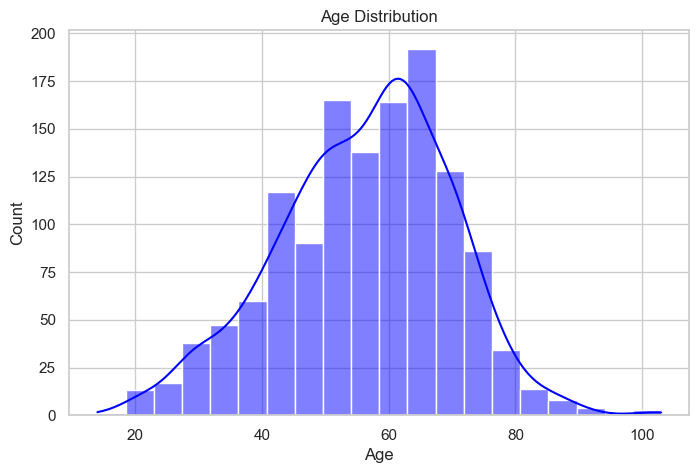

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

# 1. Distribution of Age

sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_6840\2498941451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = df, palette = 'pastel')


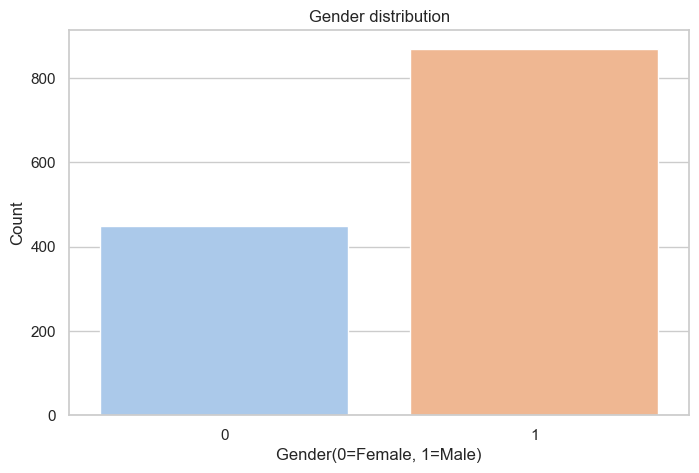

In [160]:
# 2. Gender distribution

sns.countplot(x = 'Gender', data = df, palette = 'pastel')
plt.title('Gender distribution')
plt.xlabel('Gender(0=Female, 1=Male)')
plt.ylabel('Count')
plt.show()

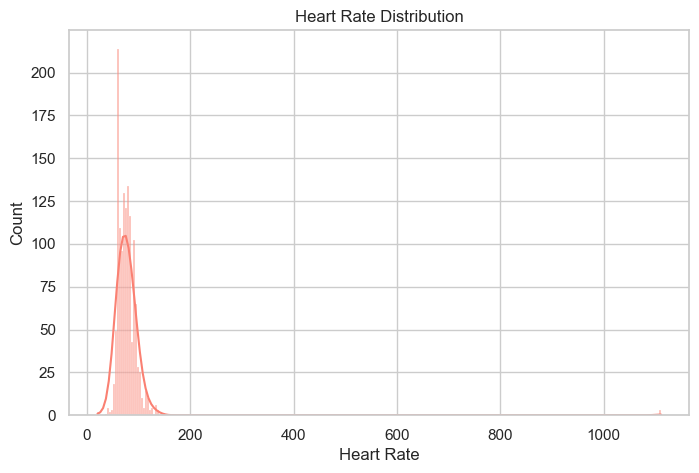

In [161]:
# 3. Heart rate distribution
sns.histplot(df['Heart rate'], kde=True, color='salmon')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.show()

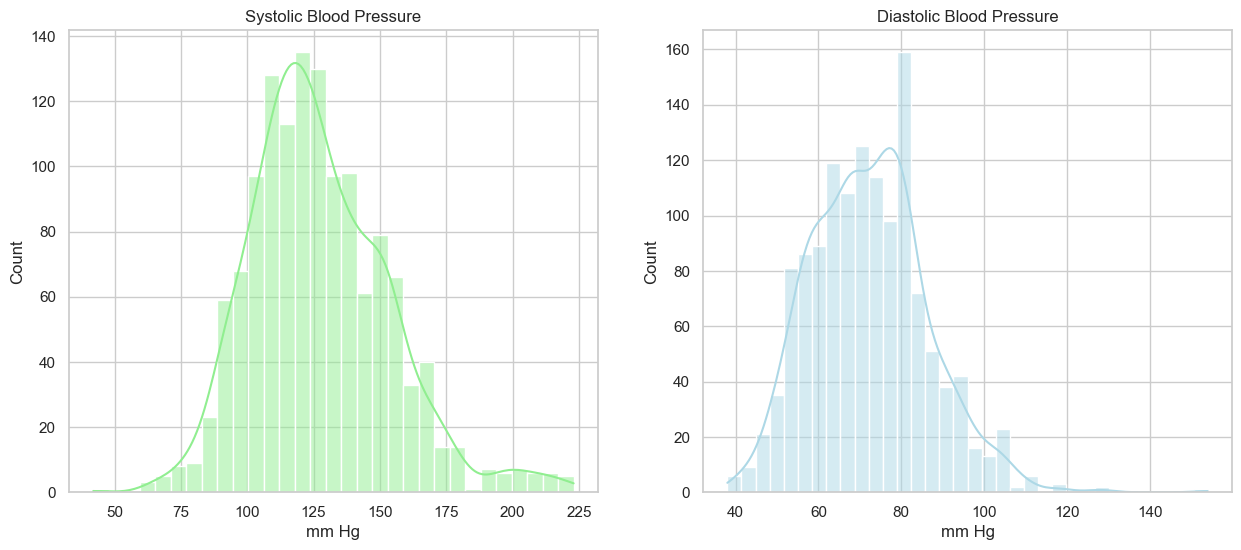

In [162]:
# 4. Systolic & Diastolic blood pressure
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df['Systolic blood pressure'], kde=True, ax=ax[0], color='lightgreen')
ax[0].set_title('Systolic Blood Pressure')
ax[0].set_xlabel('mm Hg')
sns.histplot(df['Diastolic blood pressure'], kde=True, ax=ax[1], color='lightblue')
ax[1].set_title('Diastolic Blood Pressure')
ax[1].set_xlabel('mm Hg')
plt.show()

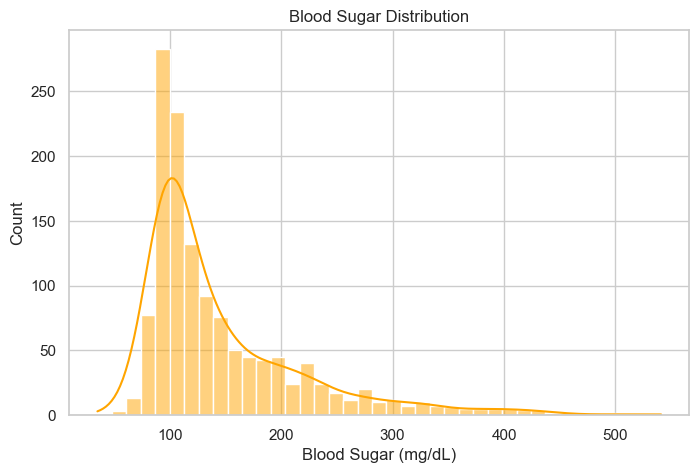

In [163]:
# 5. Blood Sugar
sns.histplot(df['Blood sugar'], kde=True, color='orange')
plt.title('Blood Sugar Distribution')
plt.xlabel('Blood Sugar (mg/dL)')
plt.ylabel('Count')
plt.show()

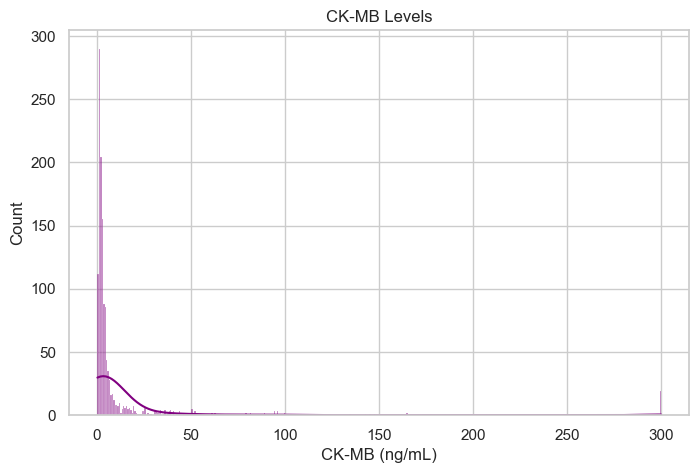

In [164]:
# 6. CK-MB Levels
sns.histplot(df['CK-MB'], kde=True, color='purple')
plt.title('CK-MB Levels')
plt.xlabel('CK-MB (ng/mL)')
plt.ylabel('Count')
plt.show()

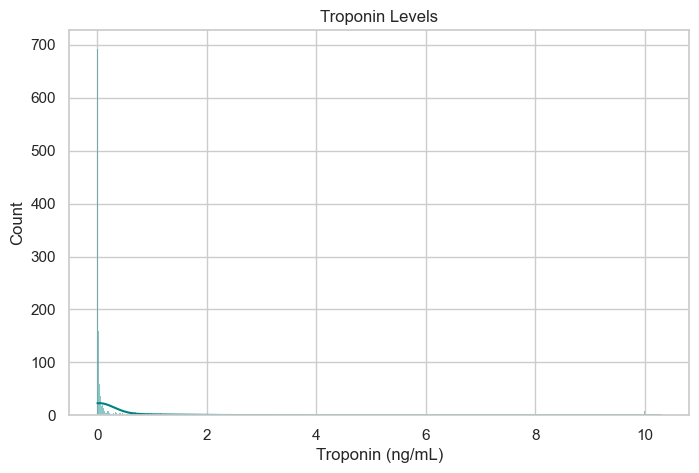

In [165]:
# 7. Troponin Levels
sns.histplot(df['Troponin'], kde=True, color='teal')
plt.title('Troponin Levels')
plt.xlabel('Troponin (ng/mL)')
plt.ylabel('Count')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_6840\2134469916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


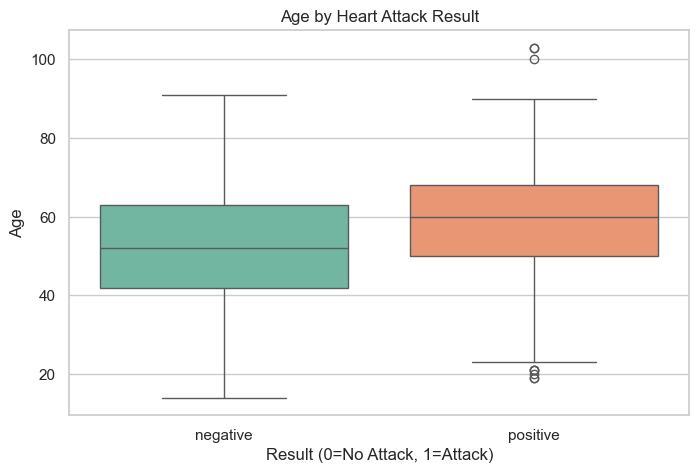

C:\Users\hp\AppData\Local\Temp\ipykernel_6840\2134469916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


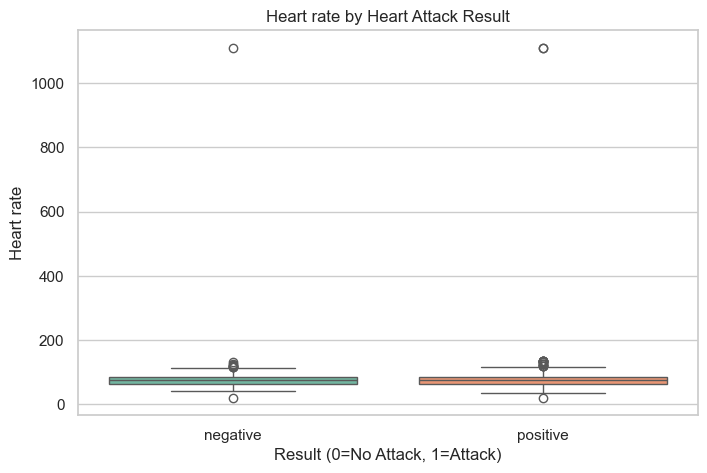

C:\Users\hp\AppData\Local\Temp\ipykernel_6840\2134469916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


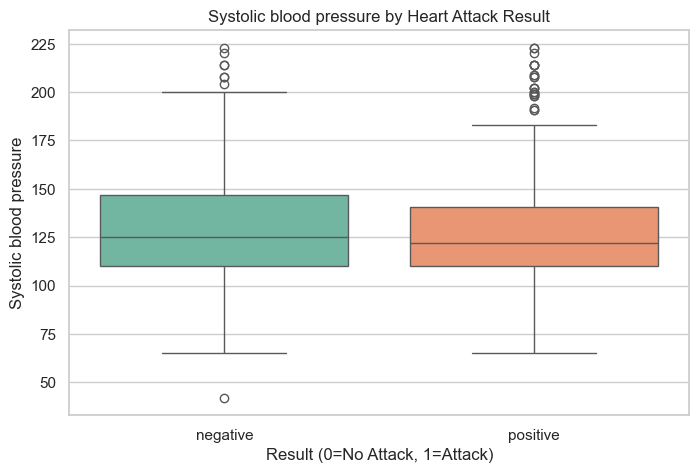

C:\Users\hp\AppData\Local\Temp\ipykernel_6840\2134469916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


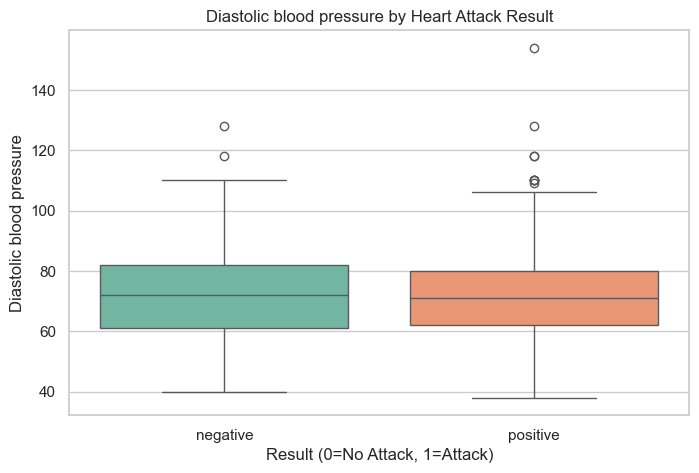

C:\Users\hp\AppData\Local\Temp\ipykernel_6840\2134469916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


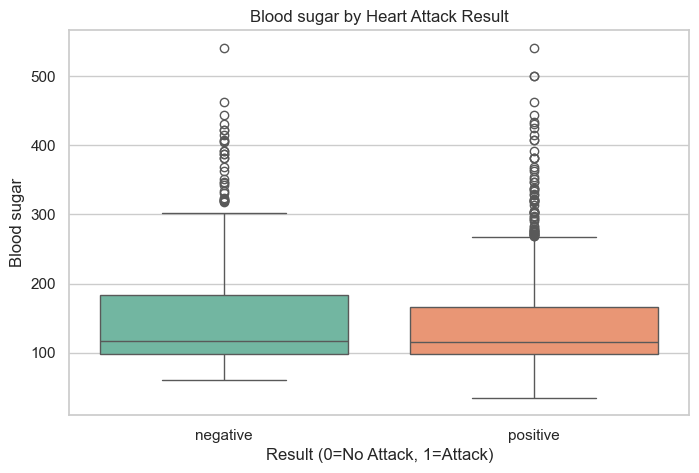

C:\Users\hp\AppData\Local\Temp\ipykernel_6840\2134469916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


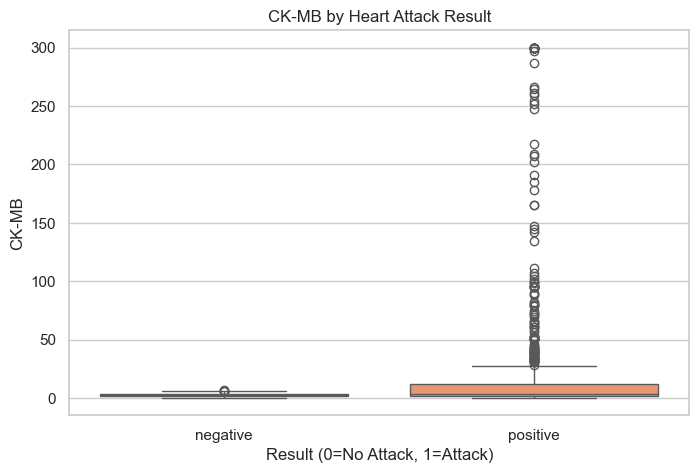

C:\Users\hp\AppData\Local\Temp\ipykernel_6840\2134469916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


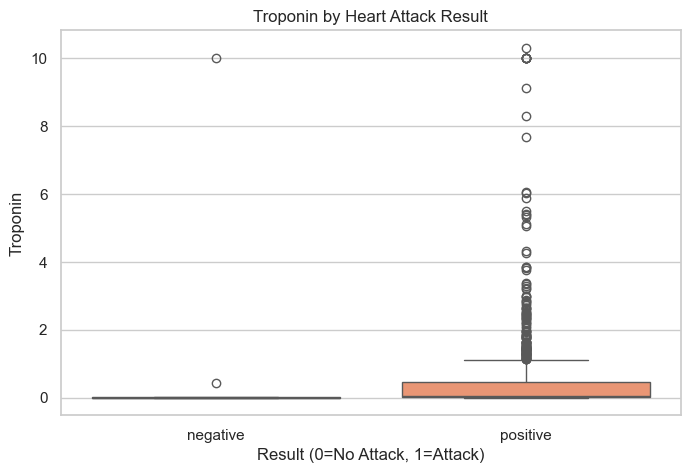

In [166]:
# 8. Boxplots for comparing features across Result
features = ['Age', 'Heart rate', 'Systolic blood pressure',
            'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

for col in features:
    sns.boxplot(x='Result', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Heart Attack Result')
    plt.xlabel('Result (0=No Attack, 1=Attack)')
    plt.ylabel(col)
    plt.show()

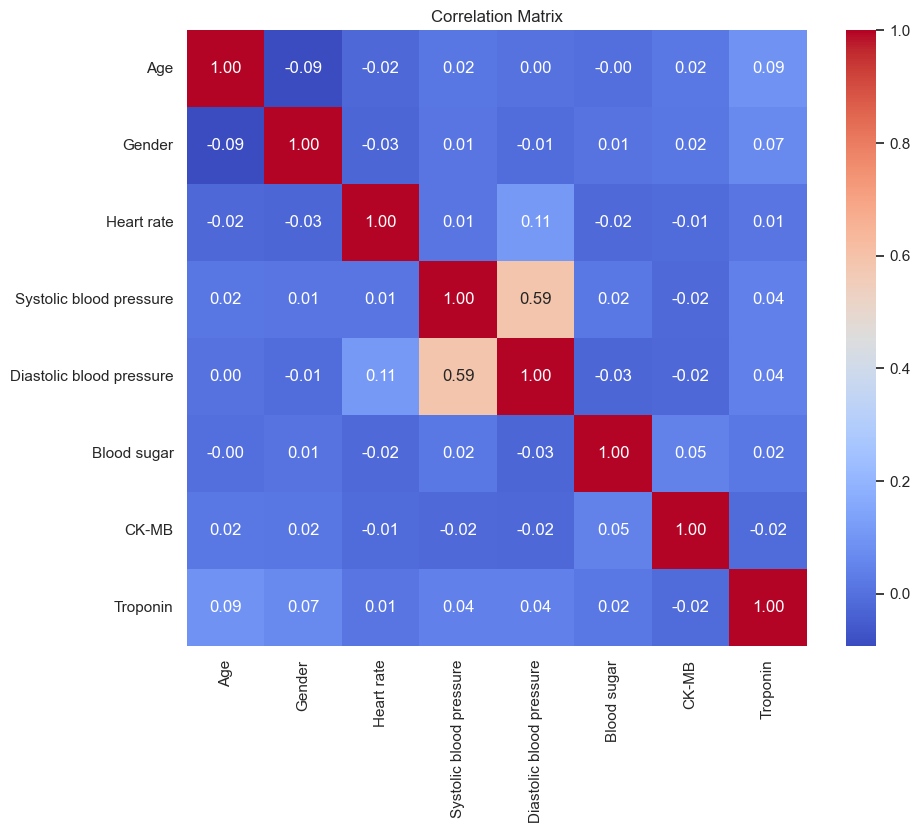

In [167]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Outlier Detection (IQR Method)

In [168]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f'{col}: {len(outliers)} outliers')

for col in features:
    detect_outliers(col)

Age: 7 outliers
Heart rate: 30 outliers
Systolic blood pressure: 32 outliers
Diastolic blood pressure: 12 outliers
Blood sugar: 92 outliers
CK-MB: 205 outliers
Troponin: 257 outliers


In [169]:
from scipy.stats import ttest_ind

positive = df[df['Result'] == 'positive']
negative = df[df['Result'] == 'negative']

for col in features:
    stat, p = ttest_ind(positive[col], negative[col])
    print(f"{col}: p-value = {p:.4f} {'(Significant)' if p < 0.05 else ''}")

Age: p-value = 0.0000 (Significant)
Heart rate: p-value = 0.8017 
Systolic blood pressure: p-value = 0.4498 
Diastolic blood pressure: p-value = 0.7260 
Blood sugar: p-value = 0.2302 
CK-MB: p-value = 0.0000 (Significant)
Troponin: p-value = 0.0000 (Significant)


In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [171]:
X = df.drop('Result', axis=1)
y = df['Result'].map({'negative':0, 'positive':1})

In [172]:
X.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [174]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7992424242424242
[[ 70  31]
 [ 22 141]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       101
           1       0.82      0.87      0.84       163

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.78       264
weighted avg       0.80      0.80      0.80       264



In [176]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# 1. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
cv = StratifiedKFold(n_splits=5)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv, scoring='accuracy')
grid.fit(X_scaled, y)

print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

# 3. Evaluate
y_pred = grid.predict(X_scaled)
print(classification_report(y, y_pred))
print("AUC-ROC:", roc_auc_score(y, grid.predict_proba(X_scaled)[:,1]))

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validated accuracy: 0.8248617352229519
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       509
           1       0.87      0.82      0.84       810

    accuracy                           0.81      1319
   macro avg       0.80      0.81      0.81      1319
weighted avg       0.82      0.81      0.81      1319

AUC-ROC: 0.8981784666133061


Find outliers and handle outliers


In [177]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Outlier detection using IQR
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return (series < (q1 - 1.5 * iqr)) | (series > (q3 + 1.5 * iqr))

# Main preprocessing + model function
def handle_outliers(df):
    df_clean = df.copy()

    # 1. Cap CK-MB at 1st and 99th percentiles
    df_clean['CK-MB'] = np.clip(df['CK-MB'], 
                                df['CK-MB'].quantile(0.01), 
                                df['CK-MB'].quantile(0.99))

    # 2. Impute outliers in Blood Sugar using median
    sugar_median = df['Blood sugar'].median()
    outlier_mask = detect_outliers_iqr(df['Blood sugar'])
    df_clean['Blood sugar'] = np.where(outlier_mask, sugar_median, df['Blood sugar'])

    # 3. Cap Systolic and Diastolic at clinical limits
    df_clean['Systolic blood pressure'] = np.clip(df['Systolic blood pressure'], 70, 240)
    df_clean['Diastolic blood pressure'] = np.clip(df['Diastolic blood pressure'], 40, 120)

    # 4. Winsorize Heart Rate
    df_clean['Heart rate'] = pd.Series(
        winsorize(df['Heart rate'], limits=(0.01, 0.01))
    )

    # 5. Keep troponin and age outliers (no change)

    return df_clean

def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return (series < (q1 - 1.5*iqr)) | (series > (q3 + 1.5*iqr))

In [178]:
df_clean = handle_outliers(df)  # Assumes 'df' is your raw dataframe

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def run_logistic_model(df_clean):
    # Split features and target
    X = df_clean.drop('Result', axis=1)
    y = df['Result'].map({'negative': 0, 'positive': 1})  # still from original df

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Evaluation
    print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return model


In [180]:
logistic_model = run_logistic_model(df_clean)

Logistic Regression Accuracy: 0.803030303030303
Confusion Matrix:
 [[ 70  31]
 [ 21 142]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73       101
           1       0.82      0.87      0.85       163

    accuracy                           0.80       264
   macro avg       0.80      0.78      0.79       264
weighted avg       0.80      0.80      0.80       264

